In [8]:
import math 
import numpy
from matplotlib import pyplot
# embed figures into the notebook 
%matplotlib inline

In [9]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries 
y_start, y_end = -1.0, 1.0            # y-direction boundaries 
x = numpy.linspace(x_start, x_end, N) # creates a 1D-array for x
y = numpy.linspace(y_start, y_end, N) # creates a 1D-array for y
X, Y = numpy.meshgrid(x, y)           # generates a mesh grid

In [17]:
kappa = 1                       # strength of the doublet 
x_doublet, y_doublet = 0.0, 0.0      # location of the doublet

In [18]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    parameters
    ----------
    Strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points. 
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field. 
    """
    u = (-strength / (2* math.pi) * 
        ((X - xd)**2 - (Y - yd)**2) /
        ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) * 
        2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y-yd)**2)**2)
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Return the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of teh doublet. 
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet. 
    X: 2D numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D numpy array of the doublet. 
        y-coordinate of the mesh points.
        
    Returns
    -------
    psi: 2D Numpy array of floats
        The steam-function.
    """
    psi = - strength / (2* math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [19]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

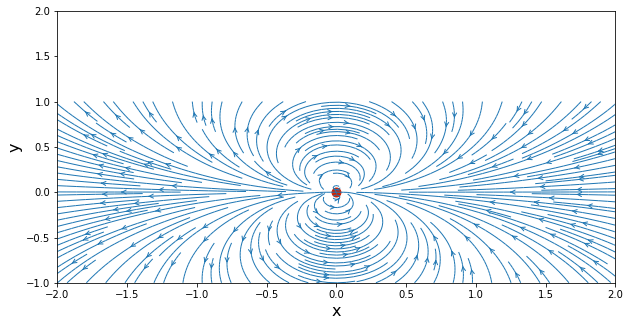

In [20]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, x_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

In [9]:
u_inf = 1.0  # freestream speed

In [10]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

psi_freestream = u_inf * Y

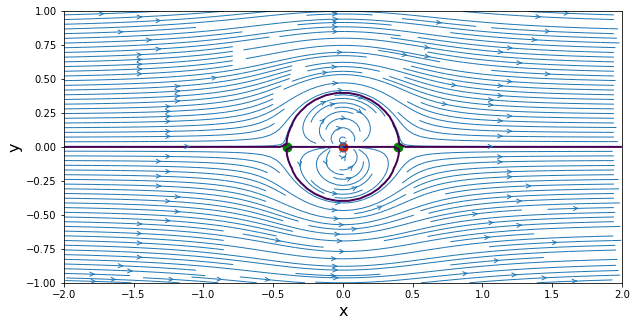

In [17]:
# superpostion of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines 
width = 10 
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], color='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


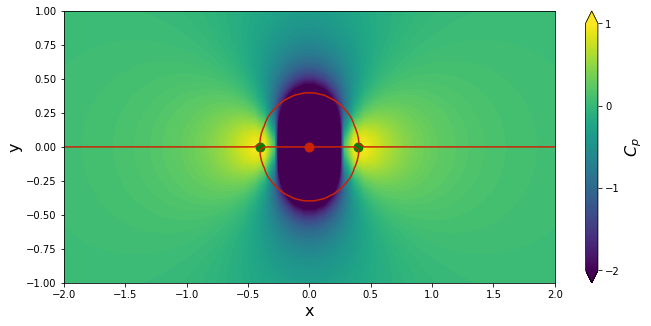

In [24]:
# compute the pressure coefficient field 
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field 
width = 10 
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidth=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');